In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


_, X_test, _, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)


best_model = trainer.models[best_model_name]

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision_per_class = precision_score(y_test, y_pred, average=None, zero_division=0)
recall_per_class = recall_score(y_test, y_pred, average=None, zero_division=0)
f1_per_class = f1_score(y_test, y_pred, average=None, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy:.4f}")
print("\nPrecision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-Score per class:", f1_per_class)
print("\nConfusion Matrix:\n", cm)

In [ ]:
# 5-fold CV on training set to check model stability
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"CV Scores: {scores}")
print(f"Mean: {scores.mean():.3f} ± {scores.std():.3f}")
# Good if std is small (<0.05), meaning stable across folds

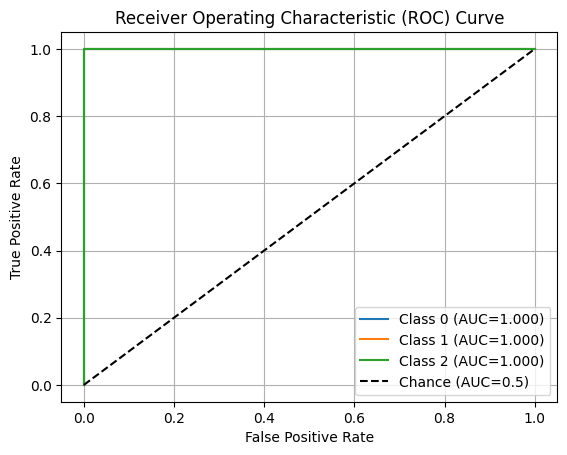

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# For each class (one-vs-rest)
for class_label in [0, 1, 2]:  # positive, negative, neutral
    y_true_binary = (y_test == class_label).astype(int)
    y_pred_proba = best_model.predict_proba(X_test)[:, class_label]

    fpr, tpr, _ = roc_curve(y_true_binary, y_pred_proba)
    roc_auc = roc_auc_score(y_true_binary, y_pred_proba)

    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC={roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC=0.5)') # Add a random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

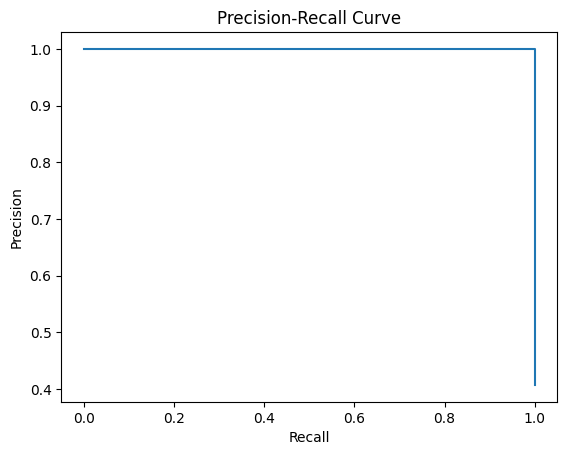

In [ ]:
# For best class (usually positive or negative)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_true_binary = (y_test == 1).astype(int)  # Example: positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_true_binary, y_pred_proba)

plt.plot(recall, precision)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# Shows tradeoff: can increase recall by lowering threshold, but precision drops
plt.show()

In [ ]:
import numpy as np

# Find misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0]

# Get top 5 with highest confidence (but wrong prediction)
top_misclassified = misclassified_indices[:5]

for idx in top_misclassified:
    # Since this is a numerical dataset, we'll print the features instead of 'original text'
    features = X_test[idx]
    predicted = y_pred[idx]
    actual = y_test[idx]
    confidence = max(best_model.predict_proba(X_test)[idx])

    print(f"Features: {features}")
    print(f"Predicted: {predicted}, Actual: {actual}, Confidence: {confidence:.2f}")
    print(f"Why did model fail? [Your analysis based on features and labels]")
    print("\n") # Add a newline for better readability between examples

Features: [1.286e+01 1.350e+00 2.320e+00 1.800e+01 1.220e+02 1.510e+00 1.250e+00
 2.100e-01 9.400e-01 4.100e+00 7.600e-01 1.290e+00 6.300e+02]
Predicted: 1, Actual: 2, Confidence: 0.81
Why did model fail? [Your analysis based on features and labels]


